<a href="https://colab.research.google.com/github/MichaelHalaj/Data-Science-CS301/blob/main/Assignment3_CS301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background and Documentation
Gradient boosting is a framework for iteratively improving any weak learner. It repeatedly selects a function that leads in the direction of a negative gradient so that it can minimize a loss function.

$$
 \hat{f}(x) = f(x,\hat\theta),
$$
$$
 \hat\theta = argmin\ \mathbb{E}_{x,y}[L(y,f(x\theta)]
$$
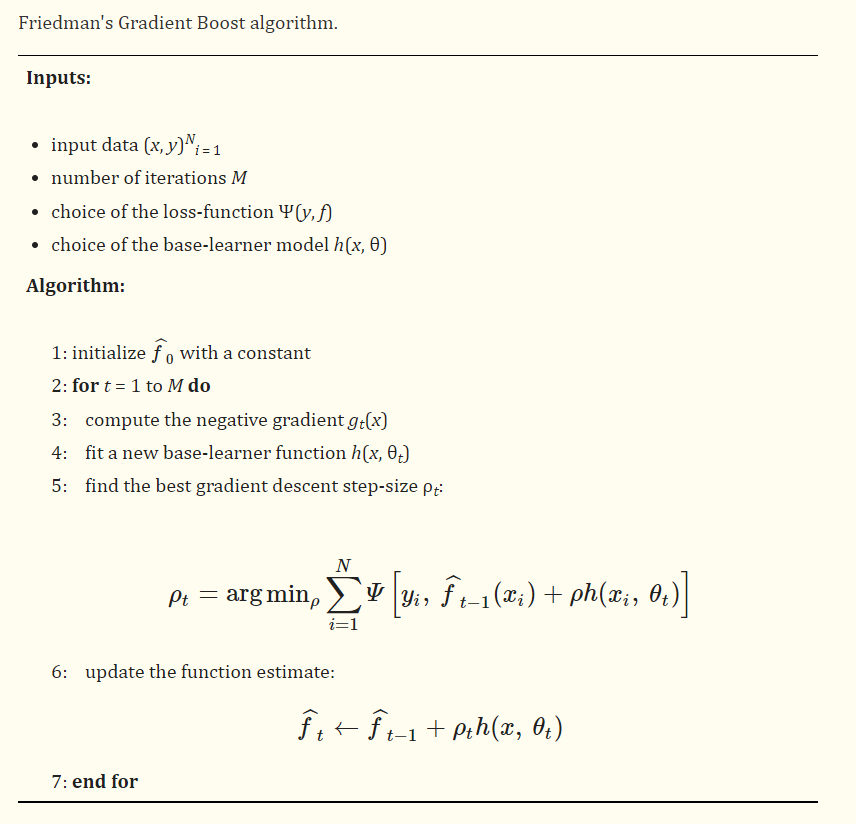

# Coding from Scratch Using JAX

Delete this after: sklearn.tree uses trees, try and figure out how to use jax's trees





In [2]:
! git clone https://github.com/pantelis/data-science-from-scratch.git
%cd /content/data-science-from-scratch/
%env PYTHONPATH=/content/data-science-from-scratch/src:/content/data-science-from-scratch/tests:/content/data-science-from-scratch/scratch:${PYTHONPATH}


Cloning into 'data-science-from-scratch'...
remote: Enumerating objects: 404, done.
remote: Counting objects: 100% (404/404), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 404 (delta 221), reused 404 (delta 221), pack-reused 0
Receiving objects: 100% (404/404), 751.07 KiB | 17.88 MiB/s, done.
Resolving deltas: 100% (221/221), done.
/content/data-science-from-scratch
env: PYTHONPATH=/content/data-science-from-scratch/src:/content/data-science-from-scratch/tests:/content/data-science-from-scratch/scratch:${PYTHONPATH}


In [ ]:
!rm -rf /content/data-science-from-scratch/



In [10]:
import jax
import jax.numpy as jnp
from jax import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scratch import decision_trees

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))


i = 300
M_iter = 3
#eps = 
#eps = np.random.uniform(0, 0.5, i)
eps = np.random.rand(i)
#x = np.random.uniform(-5, 5, i)
x = np.random.rand(i, 1)
y = np.cos(x[:,0]) + eps
#print(y)
data = pd.DataFrame(data=np.stack([x[:,0], y], axis=1), columns=["x", "y"])
data.head()


#sns.scatterplot(x="X", y="y", data=data)
#plt.show()



,x,y
0,0.971592,1.452917
1,0.611367,1.712042
2,0.359134,1.808037
3,0.362554,1.519451
4,0.481148,1.664492


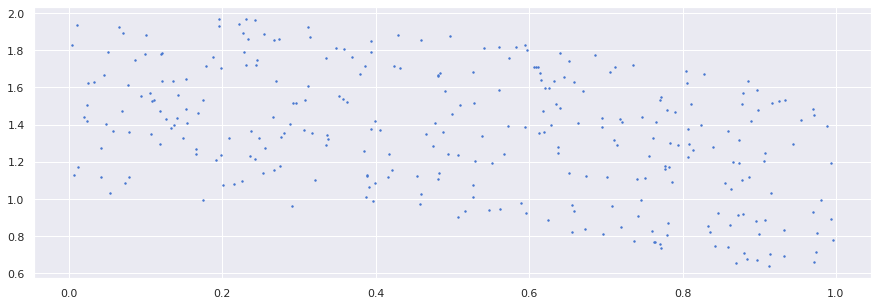

In [11]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)

ax.scatter(x,y, s=2)

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

tree_1 = DecisionTreeRegressor(max_depth=2)
tree_1.fit(x, y)
data["Tree 1 prediction"] = tree_1.predict(x)
data.head()

,x,y,Tree 1 prediction
0,0.971592,1.452917,1.074349
1,0.611367,1.712042,1.402962
2,0.359134,1.808037,1.512663
3,0.362554,1.519451,1.512663
4,0.481148,1.664492,1.402962


In [14]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
    plt.ylabel("$y$", fontsize=16)
    plt.xlabel("$X$", fontsize=16)

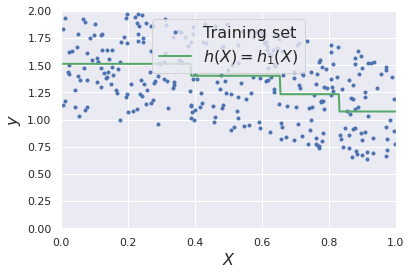

In [18]:
plot_predictions(
    [tree_1], x, y, axes=[0, 1, 0, 2], label="$h(X)=h_1(X)$", style="g-", data_label="Training set"
)
plt.show()

In [ ]:
build_tree_id3()

NameError: ignored

In [ ]:
from jax._src.tree_util import build_tree

from jax.tree_util import tree_structure
tree = tree_structure(data)
tree = build_tree(tree, (y-x)**2)
# first param is the input, second param is cross-entropy (MSE residuals)
#https://jax.readthedocs.io/en/latest/_modules/jax/_src/tree_util.html#build_tree
print(tree)

# EMG Dataset

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install unrar
!unrar x EMG\ Physical\ Action\ Data\ Set.rar

In [ ]:
import pandas as pd
import jax
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/EMG Physical Action Data Set/sub1/Aggressive/txt/Elbowing.txt', sep='\t', header=None)
print(df)